#### Serena Wisneski 
CSC 405 <br>
COVID Team 3 <br>
Project Stage III <br>
Individual Notebook <br>

**Import Libraries**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.model_selection import train_test_split
#from sklearn import datasets, linear_model
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

**Import Data Sets**

In [2]:
main_data = pd.read_csv("../data/covid_large.csv")
main_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
0,AL,0,statewide unallocated,2020-01-22,0,0,0
1,AL,0,statewide unallocated,2020-01-23,0,0,0
2,AL,0,statewide unallocated,2020-01-24,0,0,0
3,AL,0,statewide unallocated,2020-01-25,0,0,0
4,AL,0,statewide unallocated,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
757210,WY,56045,weston county,2020-09-10,21,0,6927
757211,WY,56045,weston county,2020-09-11,21,0,6927
757212,WY,56045,weston county,2020-09-12,23,0,6927
757213,WY,56045,weston county,2020-09-13,23,0,6927


clean data and get VA specific information

In [3]:
VA_main_data = main_data.loc[main_data['State'] == 'VA']

VA_main_data['Num of Cases Per Day'] = VA_main_data['Num of Cases'].diff()
VA_main_data['Num of Deaths Per Day'] = VA_main_data['Num of Deaths'].diff()

VA_main_data

C:\Users\wis10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wis10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
679716,VA,0,statewide unallocated,2020-01-22,0,0,0,NaN,NaN
679717,VA,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0
679718,VA,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0
679719,VA,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0
679720,VA,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
711469,VA,51840,winchester city,2020-09-10,461,4,28078,0.0,0.0
711470,VA,51840,winchester city,2020-09-11,461,4,28078,0.0,0.0
711471,VA,51840,winchester city,2020-09-12,465,4,28078,4.0,0.0
711472,VA,51840,winchester city,2020-09-13,467,4,28078,2.0,0.0


In [4]:
VA_main_data= VA_main_data[VA_main_data['Date'] != '2020-01-22']
VA_data_date = VA_main_data.groupby("Date").sum().reset_index()

#Convertion to date format and stripping time
VA_data_date['Date'] = VA_data_date.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

VA_data_date= VA_data_date.drop(['countyFIPS','Num of Cases','Num of Deaths'],axis=1)

VA_data_date

,Date,population,Num of Cases Per Day,Num of Deaths Per Day
0,2020-01-23,8535519,0.0,0.0
1,2020-01-24,8535519,0.0,0.0
2,2020-01-25,8535519,0.0,0.0
3,2020-01-26,8535519,0.0,0.0
4,2020-01-27,8535519,0.0,0.0
...,...,...,...,...
231,2020-09-10,8535519,1236.0,11.0
232,2020-09-11,8535519,1118.0,4.0
233,2020-09-12,8535519,1302.0,11.0
234,2020-09-13,8535519,869.0,2.0


In [5]:
first_case_index = VA_data_date['Num of Cases Per Day'].ne(0).idxmax() 
first_death_index= VA_data_date['Num of Deaths Per Day'].ne(0).idxmax() 
VA_data_date.tail()

,Date,population,Num of Cases Per Day,Num of Deaths Per Day
231,2020-09-10,8535519,1236.0,11.0
232,2020-09-11,8535519,1118.0,4.0
233,2020-09-12,8535519,1302.0,11.0
234,2020-09-13,8535519,869.0,2.0
235,2020-09-14,8535519,758.0,19.0


In [6]:
numOfDeathsSinceDay1=[]
counter=1
for i,index in enumerate(range(len(VA_data_date))):
    if i<=first_death_index:
        numOfDeathsSinceDay1.insert(index, 0) 
    else:
        numOfDeathsSinceDay1.insert(index, counter) 
        counter = counter+1
        
#print(numOfCasesSinceDay1)   
VA_data_date.insert(2, "numOfDeathsSinceDay1", numOfDeathsSinceDay1)

In [7]:
numOfCasesSinceDay1=[]
counter=1
for i,index in enumerate(range(len(VA_data_date))):
    if i<=first_case_index:
        numOfCasesSinceDay1.insert(index, 0) 
    else:
        numOfCasesSinceDay1.insert(index, counter) 
        counter = counter+1
        
#print(numOfCasesSinceDay1)   
VA_data_date.insert(2, "numOfCasesSinceDay1", numOfCasesSinceDay1)

In [8]:
VA_data_date

,Date,population,numOfCasesSinceDay1,numOfDeathsSinceDay1,Num of Cases Per Day,Num of Deaths Per Day
0,2020-01-23,8535519,0,0,0.0,0.0
1,2020-01-24,8535519,0,0,0.0,0.0
2,2020-01-25,8535519,0,0,0.0,0.0
3,2020-01-26,8535519,0,0,0.0,0.0
4,2020-01-27,8535519,0,0,0.0,0.0
...,...,...,...,...,...,...
231,2020-09-10,8535519,186,180,1236.0,11.0
232,2020-09-11,8535519,187,181,1118.0,4.0
233,2020-09-12,8535519,188,182,1302.0,11.0
234,2020-09-13,8535519,189,183,869.0,2.0


In [9]:
VA_cases = VA_data_date[['numOfCasesSinceDay1','Num of Cases Per Day']]

VA_cases

,numOfCasesSinceDay1,Num of Cases Per Day
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
231,186,1236.0
232,187,1118.0
233,188,1302.0
234,189,869.0


In [10]:
X = VA_cases.iloc[:,0].values.reshape(-1, 1) 
y = VA_cases.iloc[:,1].values.reshape(-1, 1) 
y

array([[0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [2.000e+00],
       [4.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
y_train

array([[ 495.],
       [ 925.],
       [ 823.],
       [1370.],
       [ 331.],
       [   0.],
       [ 456.],
       [ 676.],
       [ 426.],
       [ 656.],
       [ 144.],
       [1198.],
       [1026.],
       [1155.],
       [1308.],
       [ 850.],
       [   0.],
       [ 447.],
       [ 801.],
       [   0.],
       [   0.],
       [  36.],
       [ 595.],
       [   3.],
       [ 150.],
       [   0.],
       [ 314.],
       [ 658.],
       [ 744.],
       [   0.],
       [   0.],
       [   0.],
       [ 822.],
       [   0.],
       [   0.],
       [ 861.],
       [  34.],
       [  16.],
       [ 996.],
       [ 732.],
       [   0.],
       [1000.],
       [1608.],
       [  22.],
       [ 911.],
       [ 197.],
       [  10.],
       [ 455.],
       [ 655.],
       [ 438.],
       [ 561.],
       [1481.],
       [ 893.],
       [1157.],
       [ 941.],
       [   0.],
       [   0.],
       [   0.],
       [  21.],
       [ 893.],
       [   0.],
       [ 485.],
       [

In [12]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
cases_prediction = lm.predict(X)

In [14]:
print(metrics.mean_absolute_error(y,cases_prediction))

205.20607230829032


In [15]:
print(metrics.mean_squared_error(y,cases_prediction))

70465.72586623523


In [16]:
print(np.sqrt(metrics.mean_squared_error(y,cases_prediction)))

265.4538111729331


In [17]:
r2_score(y,cases_prediction)

0.6359112184345435

In [18]:
future_dates = np.array([235,236,237,238,239,240,241])
future_dates = np.arange(235,242).reshape(-1,1)
future_cases = lm.predict(future_dates)

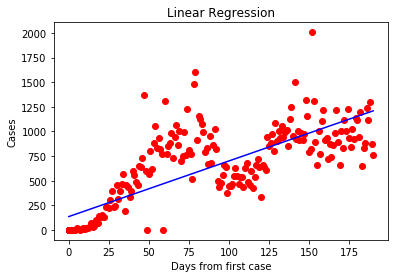

In [19]:
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lm.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Days from first case')
    plt.ylabel('Cases')
    plt.show()
    return
viz_linear()

In [20]:
poly = PolynomialFeatures(degree = 2)
poly_features = poly.fit_transform(X)
poly.fit(X,y)
poly_regression = LinearRegression()
poly_regression.fit(poly_features,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
poly3 = PolynomialFeatures(degree = 3)
poly_features3 = poly3.fit_transform(X)
poly3.fit(X,y)
poly_regression3 = LinearRegression()
poly_regression3.fit(poly_features3,y)

poly4 = PolynomialFeatures(degree = 4)
poly_features4 = poly4.fit_transform(X)
poly3.fit(X,y)
poly_regression4 = LinearRegression()
poly_regression4.fit(poly_features4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

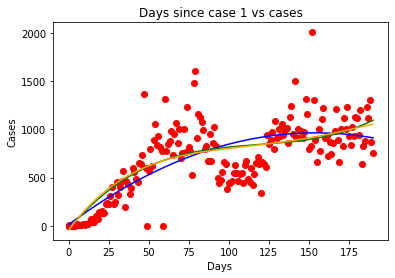

In [22]:
#ploting the data  for polynomial regression 
def viz_poly():
    plt.scatter(X, y, color='red')
    plt.plot(X,poly_regression.predict(poly_features),color='blue')
    plt.plot(X,poly_regression3.predict(poly_features3),color='green')
    plt.plot(X,poly_regression4.predict(poly_features4),color='orange')
    plt.title("Days since case 1 vs cases")
    plt.xlabel("Days ")
    plt.ylabel("Cases")
    plt.show()
    return
viz_poly()

In [23]:
VA_deaths = VA_data_date[['numOfDeathsSinceDay1','Num of Deaths Per Day']]

X_d = VA_deaths.iloc[:,0].values.reshape(-1, 1) 
y_d = VA_deaths.iloc[:,1].values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(X_d, y_d)

deaths_prediction = lm.predict(X_d)

In [24]:
print(metrics.mean_absolute_error(y_d,deaths_prediction))
print(metrics.mean_squared_error(y_d,deaths_prediction))
print(np.sqrt(metrics.mean_squared_error(y_d,deaths_prediction)))

9.638024968522979
153.58242183407867
12.39283752149114


In [25]:
r2_score(y_d,deaths_prediction)

0.07916339365641623

In [26]:
future_dates_deaths = np.arange(235,242).reshape(-1,1)
future_deaths = lm.predict(future_dates_deaths)
future_deaths

array([[21.39322708],
       [21.45321151],
       [21.51319594],
       [21.57318037],
       [21.63316481],
       [21.69314924],
       [21.75313367]])

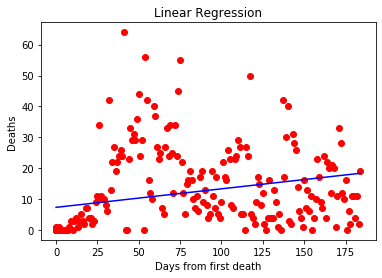

In [27]:
def viz_linear():
    plt.scatter(X_d, y_d, color='red')
    plt.plot(X_d, lm.predict(X_d), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Days from first death')
    plt.ylabel('Deaths')
    plt.show()
    return
viz_linear()

In [28]:
poly_d = PolynomialFeatures(degree = 2)
poly_features_d = poly_d.fit_transform(X_d)
poly_d.fit(X_d,y_d)
poly_regression_d = LinearRegression()
poly_regression_d.fit(poly_features_d,y_d)

poly_d1 = PolynomialFeatures(degree = 3)
poly_features_d1 = poly_d1.fit_transform(X_d)
poly_d1.fit(X_d,y_d)
poly_regression_d1 = LinearRegression()
poly_regression_d1.fit(poly_features_d1,y_d)

poly_d2 = PolynomialFeatures(degree = 4)
poly_features_d2 = poly_d2.fit_transform(X_d)
poly_d2.fit(X_d,y_d)
poly_regression_d2 = LinearRegression()
poly_regression_d2.fit(poly_features_d2,y_d)

poly_d5 = PolynomialFeatures(degree = 5)
poly_features_d5 = poly_d5.fit_transform(X_d)
poly_d5.fit(X_d,y_d)
poly_regression_d5 = LinearRegression()
poly_regression_d5.fit(poly_features_d5,y_d)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

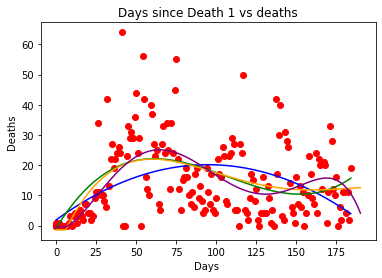

In [29]:
#ploting the data  for polynomial regression 
def viz_poly():
    plt.scatter(X_d, y_d, color='red')
    plt.plot(X_d,poly_regression_d.predict(poly_features_d),color='blue')
    plt.plot(X_d,poly_regression_d1.predict(poly_features_d1),color='green')
    plt.plot(X,poly_regression_d2.predict(poly_features_d2),color='orange')
    plt.plot(X,poly_regression_d5.predict(poly_features_d5),color='purple')
    plt.title("Days since Death 1 vs deaths")
    plt.xlabel("Days ")
    plt.ylabel("Deaths")
    plt.show()
    return
viz_poly()

In [30]:
poly_features_fd = poly_d1.fit_transform(future_dates_deaths)
poly_regression_d1.predict(poly_features_fd)

array([[57.15755999],
       [58.51309991],
       [59.89279374],
       [61.29682835],
       [62.72539059],
       [64.17866733],
       [65.65684541]])

In [31]:
print(poly_regression_d1.coef_)
# Computing the Y-intercept
print(poly_regression_d1.intercept_)
print(metrics.mean_squared_error(y_d,poly_regression_d1.predict(poly_features_d1)))
print(np.sqrt(metrics.mean_squared_error(y_d,poly_regression_d1.predict(poly_features_d1))))

[[ 0.00000000e+00  8.70890395e-01 -9.97231740e-03  3.11430453e-05]]
[-0.9510032]
102.25148080773481
10.111947429043271


In [32]:
r2_score(y_d,poly_regression_d5.predict(poly_features_d5))

0.4284623135424468

### Identify Top Five Counties

In [33]:
VA_data = VA_main_data.copy()
VA_data['New Cases Per Day'] = VA_data['Num of Cases'].diff()
VA_data['New Deaths Per Day'] = VA_data['Num of Deaths'].diff()
VA_data['New Cases Per Day Normalized']= (VA_data['New Cases Per Day']/VA_data['population'])*1000
VA_data['New Deaths Per Day Normalized']= (VA_data['New Deaths Per Day']/VA_data['population'])*1000
VA_data= VA_data[VA_data['Date'] != '2020-01-22']
VA_data = VA_data.fillna(0)

In [34]:
VA_data_cases = VA_data.groupby('County Name')['New Cases Per Day Normalized'].max()
VA_data_deaths = VA_data.groupby('County Name')['New Deaths Per Day Normalized'].max()
VA_high = pd.concat([VA_data_cases, VA_data_deaths], axis=1)
VA_high.columns = ["Cases", "Deaths"]
VA_high.sort_values(['Cases', 'Deaths'], ascending=[False, False])

,Cases,Deaths
County Name,,
richmond county,6.317189,0.110828
greensville county,5.557516,0.264644
galax city,5.041752,0.787774
emporia city,4.115226,0.748223
radford city,3.726232,0.000000
...,...,...
rockbridge county,0.221504,0.044301
louisa county,0.212817,0.026602
orange county,0.188929,0.026990


In [35]:
high_cases  = VA_high.nlargest(10, ['Cases'])
high_deaths  = VA_high.nlargest(10, ['Deaths'])

high_counties = pd.merge(high_cases, high_deaths, left_index=True, right_index=True)
high_counties

,Cases_x,Deaths_x,Cases_y,Deaths_y
County Name,,,,
greensville county,5.557516,0.264644,5.557516,0.264644
galax city,5.041752,0.787774,5.041752,0.787774
emporia city,4.115226,0.748223,4.115226,0.748223
northampton county,3.415884,0.341588,3.415884,0.341588
franklin city,2.761391,0.251036,2.761391,0.251036


In [36]:
green_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'greensville county']
galax_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'galax city']
empor_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'emporia city']
north_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'northampton county']
frank_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'franklin county']

C:\Users\wis10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


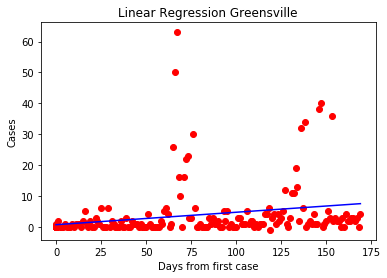

In [37]:
green_main_data= green_main_data[VA_main_data['Date'] != '2020-01-22']
green_data_date = green_main_data.groupby("Date").sum().reset_index()

#Convertion to date format and stripping time
green_data_date['Date'] = green_data_date.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

green_data_date= green_data_date.drop(['countyFIPS','Num of Cases','Num of Deaths'],axis=1)

first_case_index = green_data_date['Num of Cases Per Day'].ne(0).idxmax() 
first_death_index= green_data_date['Num of Deaths Per Day'].ne(0).idxmax()

numOfDeathsSinceDay1=[]
counter=1
for i,index in enumerate(range(len(green_data_date))):
    if i<=first_death_index:
        numOfDeathsSinceDay1.insert(index, 0) 
    else:
        numOfDeathsSinceDay1.insert(index, counter) 
        counter = counter+1
        
green_data_date.insert(2, "numOfDeathsSinceDay1", numOfDeathsSinceDay1)

numOfCasesSinceDay1=[]
counter=1
for i,index in enumerate(range(len(green_data_date))):
    if i<=first_case_index:
        numOfCasesSinceDay1.insert(index, 0) 
    else:
        numOfCasesSinceDay1.insert(index, counter) 
        counter = counter+1

green_data_date.insert(2, "numOfCasesSinceDay1", numOfCasesSinceDay1)

green_cases = green_data_date[['numOfCasesSinceDay1','Num of Cases Per Day']]

X = green_cases.iloc[:,0].values.reshape(-1, 1) 
y = green_cases.iloc[:,1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


lm = LinearRegression()
lm.fit(X, y)

cases_prediction = lm.predict(X)

future_cases_green = lm.predict(future_dates)

def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lm.predict(X), color='blue')
    plt.title('Linear Regression Greensville')
    plt.xlabel('Days from first case')
    plt.ylabel('Cases')
    plt.show()
    return
viz_linear()

C:\Users\wis10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


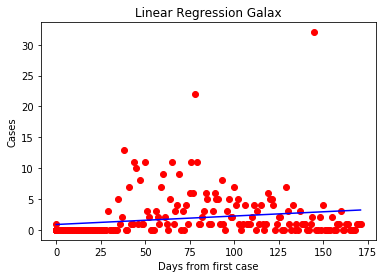

In [38]:
galax_main_data= galax_main_data[VA_main_data['Date'] != '2020-01-22']
galax_data_date = galax_main_data.groupby("Date").sum().reset_index()

#Convertion to date format and stripping time
galax_data_date['Date'] = galax_data_date.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

galax_data_date= galax_data_date.drop(['countyFIPS','Num of Cases','Num of Deaths'],axis=1)

first_case_index = galax_data_date['Num of Cases Per Day'].ne(0).idxmax() 
first_death_index= galax_data_date['Num of Deaths Per Day'].ne(0).idxmax()

numOfDeathsSinceDay1=[]
counter=1
for i,index in enumerate(range(len(galax_data_date))):
    if i<=first_death_index:
        numOfDeathsSinceDay1.insert(index, 0) 
    else:
        numOfDeathsSinceDay1.insert(index, counter) 
        counter = counter+1
        
galax_data_date.insert(2, "numOfDeathsSinceDay1", numOfDeathsSinceDay1)

numOfCasesSinceDay1=[]
counter=1
for i,index in enumerate(range(len(galax_data_date))):
    if i<=first_case_index:
        numOfCasesSinceDay1.insert(index, 0) 
    else:
        numOfCasesSinceDay1.insert(index, counter) 
        counter = counter+1

galax_data_date.insert(2, "numOfCasesSinceDay1", numOfCasesSinceDay1)

galax_cases = galax_data_date[['numOfCasesSinceDay1','Num of Cases Per Day']]

X = galax_cases.iloc[:,0].values.reshape(-1, 1) 
y = galax_cases.iloc[:,1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


lm = LinearRegression()
lm.fit(X, y)

cases_prediction = lm.predict(X)

future_cases_galax = lm.predict(future_dates)

def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lm.predict(X), color='blue')
    plt.title('Linear Regression Galax')
    plt.xlabel('Days from first case')
    plt.ylabel('Cases')
    plt.show()
    return
viz_linear()

C:\Users\wis10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


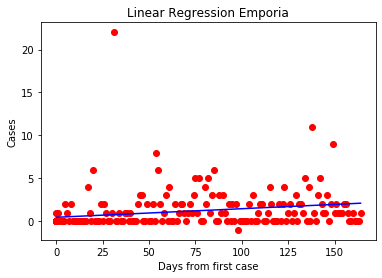

In [39]:
empor_main_data= empor_main_data[VA_main_data['Date'] != '2020-01-22']
empor_data_date = empor_main_data.groupby("Date").sum().reset_index()

#Convertion to date format and stripping time
empor_data_date['Date'] = empor_data_date.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

empor_data_date= empor_data_date.drop(['countyFIPS','Num of Cases','Num of Deaths'],axis=1)

first_case_index = empor_data_date['Num of Cases Per Day'].ne(0).idxmax() 
first_death_index= empor_data_date['Num of Deaths Per Day'].ne(0).idxmax()

numOfDeathsSinceDay1=[]
counter=1
for i,index in enumerate(range(len(empor_data_date))):
    if i<=first_death_index:
        numOfDeathsSinceDay1.insert(index, 0) 
    else:
        numOfDeathsSinceDay1.insert(index, counter) 
        counter = counter+1
        
empor_data_date.insert(2, "numOfDeathsSinceDay1", numOfDeathsSinceDay1)

numOfCasesSinceDay1=[]
counter=1
for i,index in enumerate(range(len(empor_data_date))):
    if i<=first_case_index:
        numOfCasesSinceDay1.insert(index, 0) 
    else:
        numOfCasesSinceDay1.insert(index, counter) 
        counter = counter+1

empor_data_date.insert(2, "numOfCasesSinceDay1", numOfCasesSinceDay1)

empor_cases = empor_data_date[['numOfCasesSinceDay1','Num of Cases Per Day']]

X = empor_cases.iloc[:,0].values.reshape(-1, 1) 
y = empor_cases.iloc[:,1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


lm = LinearRegression()
lm.fit(X, y)

cases_prediction = lm.predict(X)

future_cases_empor = lm.predict(future_dates)

def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lm.predict(X), color='blue')
    plt.title('Linear Regression Emporia')
    plt.xlabel('Days from first case')
    plt.ylabel('Cases')
    plt.show()
    return
viz_linear()

C:\Users\wis10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


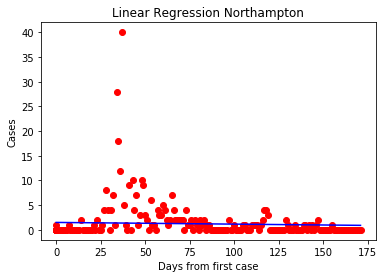

In [40]:
north_main_data= north_main_data[VA_main_data['Date'] != '2020-01-22']
north_data_date = north_main_data.groupby("Date").sum().reset_index()

#Convertion to date format and stripping time
north_data_date['Date'] = north_data_date.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

north_data_date= north_data_date.drop(['countyFIPS','Num of Cases','Num of Deaths'],axis=1)

first_case_index = north_data_date['Num of Cases Per Day'].ne(0).idxmax() 
first_death_index= north_data_date['Num of Deaths Per Day'].ne(0).idxmax()

numOfDeathsSinceDay1=[]
counter=1
for i,index in enumerate(range(len(north_data_date))):
    if i<=first_death_index:
        numOfDeathsSinceDay1.insert(index, 0) 
    else:
        numOfDeathsSinceDay1.insert(index, counter) 
        counter = counter+1
        
north_data_date.insert(2, "numOfDeathsSinceDay1", numOfDeathsSinceDay1)

numOfCasesSinceDay1=[]
counter=1
for i,index in enumerate(range(len(north_data_date))):
    if i<=first_case_index:
        numOfCasesSinceDay1.insert(index, 0) 
    else:
        numOfCasesSinceDay1.insert(index, counter) 
        counter = counter+1

north_data_date.insert(2, "numOfCasesSinceDay1", numOfCasesSinceDay1)

north_cases = north_data_date[['numOfCasesSinceDay1','Num of Cases Per Day']]

X = north_cases.iloc[:,0].values.reshape(-1, 1) 
y = north_cases.iloc[:,1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


lm = LinearRegression()
lm.fit(X, y)

cases_prediction = lm.predict(X)

future_cases_north = lm.predict(future_dates)

def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lm.predict(X), color='blue')
    plt.title('Linear Regression Northampton')
    plt.xlabel('Days from first case')
    plt.ylabel('Cases')
    plt.show()
    return
viz_linear()

C:\Users\wis10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


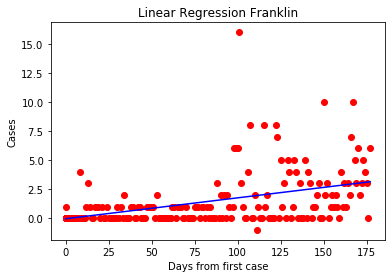

In [41]:
frank_main_data= frank_main_data[VA_main_data['Date'] != '2020-01-22']
frank_data_date = frank_main_data.groupby("Date").sum().reset_index()

#Convertion to date format and stripping time
frank_data_date['Date'] = frank_data_date.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

frank_data_date= frank_data_date.drop(['countyFIPS','Num of Cases','Num of Deaths'],axis=1)

first_case_index = frank_data_date['Num of Cases Per Day'].ne(0).idxmax() 
first_death_index= frank_data_date['Num of Deaths Per Day'].ne(0).idxmax()

numOfDeathsSinceDay1=[]
counter=1
for i,index in enumerate(range(len(frank_data_date))):
    if i<=first_death_index:
        numOfDeathsSinceDay1.insert(index, 0) 
    else:
        numOfDeathsSinceDay1.insert(index, counter) 
        counter = counter+1
        
frank_data_date.insert(2, "numOfDeathsSinceDay1", numOfDeathsSinceDay1)

numOfCasesSinceDay1=[]
counter=1
for i,index in enumerate(range(len(frank_data_date))):
    if i<=first_case_index:
        numOfCasesSinceDay1.insert(index, 0) 
    else:
        numOfCasesSinceDay1.insert(index, counter) 
        counter = counter+1

frank_data_date.insert(2, "numOfCasesSinceDay1", numOfCasesSinceDay1)

frank_cases = frank_data_date[['numOfCasesSinceDay1','Num of Cases Per Day']]

X = frank_cases.iloc[:,0].values.reshape(-1, 1) 
y = frank_cases.iloc[:,1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


lm = LinearRegression()
lm.fit(X, y)

cases_prediction = lm.predict(X)

future_cases_frank = lm.predict(future_dates)

def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lm.predict(X), color='blue')
    plt.title('Linear Regression Franklin')
    plt.xlabel('Days from first case')
    plt.ylabel('Cases')
    plt.show()
    return
viz_linear()

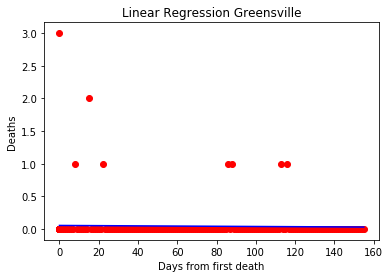

In [42]:
green_deaths = green_data_date[['numOfDeathsSinceDay1','Num of Deaths Per Day']]

X_d = green_deaths.iloc[:,0].values.reshape(-1, 1) 
y_d = green_deaths.iloc[:,1].values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(X_d, y_d)

deaths_prediction = lm.predict(X_d)

future_dates_deaths_green = np.arange(235,242).reshape(-1,1)
future_deaths_green = lm.predict(future_dates_deaths)

def viz_linear():
    plt.scatter(X_d, y_d, color='red')
    plt.plot(X_d, lm.predict(X_d), color='blue')
    plt.title('Linear Regression Greensville')
    plt.xlabel('Days from first death')
    plt.ylabel('Deaths')
    plt.show()
    return
viz_linear()

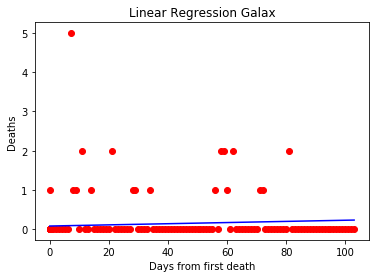

In [43]:
galax_deaths = galax_data_date[['numOfDeathsSinceDay1','Num of Deaths Per Day']]

X_d = galax_deaths.iloc[:,0].values.reshape(-1, 1) 
y_d = galax_deaths.iloc[:,1].values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(X_d, y_d)

deaths_prediction = lm.predict(X_d)

future_dates_deaths_galax = np.arange(235,242).reshape(-1,1)
future_deaths_galax = lm.predict(future_dates_deaths)

def viz_linear():
    plt.scatter(X_d, y_d, color='red')
    plt.plot(X_d, lm.predict(X_d), color='blue')
    plt.title('Linear Regression Galax')
    plt.xlabel('Days from first death')
    plt.ylabel('Deaths')
    plt.show()
    return
viz_linear()

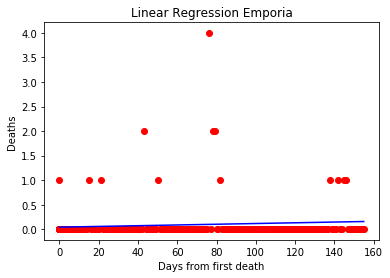

In [44]:
empor_deaths = empor_data_date[['numOfDeathsSinceDay1','Num of Deaths Per Day']]

X_d = empor_deaths.iloc[:,0].values.reshape(-1, 1) 
y_d = empor_deaths.iloc[:,1].values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(X_d, y_d)

deaths_prediction = lm.predict(X_d)

future_dates_deaths_empor = np.arange(235,242).reshape(-1,1)
future_deaths_empor = lm.predict(future_dates_deaths)

def viz_linear():
    plt.scatter(X_d, y_d, color='red')
    plt.plot(X_d, lm.predict(X_d), color='blue')
    plt.title('Linear Regression Emporia')
    plt.xlabel('Days from first death')
    plt.ylabel('Deaths')
    plt.show()
    return
viz_linear()

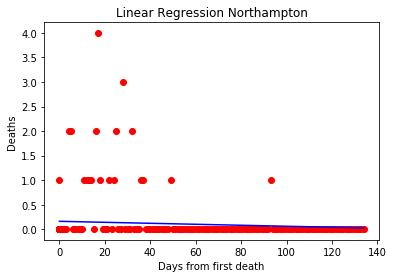

In [45]:
north_deaths = north_data_date[['numOfDeathsSinceDay1','Num of Deaths Per Day']]

X_d = north_deaths.iloc[:,0].values.reshape(-1, 1) 
y_d = north_deaths.iloc[:,1].values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(X_d, y_d)

deaths_prediction = lm.predict(X_d)

future_dates_deaths_north = np.arange(235,242).reshape(-1,1)
future_deaths_north = lm.predict(future_dates_deaths)

def viz_linear():
    plt.scatter(X_d, y_d, color='red')
    plt.plot(X_d, lm.predict(X_d), color='blue')
    plt.title('Linear Regression Northampton')
    plt.xlabel('Days from first death')
    plt.ylabel('Deaths')
    plt.show()
    return
viz_linear()

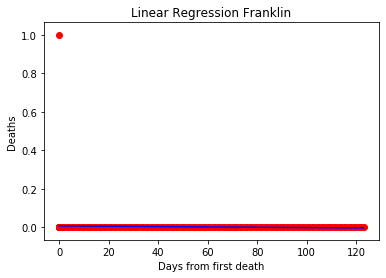

In [46]:
frank_deaths = frank_data_date[['numOfDeathsSinceDay1','Num of Deaths Per Day']]

X_d = frank_deaths.iloc[:,0].values.reshape(-1, 1) 
y_d = frank_deaths.iloc[:,1].values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(X_d, y_d)

deaths_prediction = lm.predict(X_d)

future_dates_deaths_frank = np.arange(235,242).reshape(-1,1)
future_deaths_frank = lm.predict(future_dates_deaths)

def viz_linear():
    plt.scatter(X_d, y_d, color='red')
    plt.plot(X_d, lm.predict(X_d), color='blue')
    plt.title('Linear Regression Franklin')
    plt.xlabel('Days from first death')
    plt.ylabel('Deaths')
    plt.show()
    return
viz_linear()

### Hospital Bed Data KS

import and clean data

In [47]:
hospital_beds = pd.read_csv('../data/COVID_HospitalBeds_merged_df.csv')
hospital_beds

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_CITY,HQ_ZIP_CODE,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,AL,1001,autauga county,2020-01-22,0,0,55869,Prattville Baptist Hospital,Short Term Acute Care Hospital,Prattville,36067,85,55,6,6,0,0.623113,30,2
1,AL,1001,autauga county,2020-01-23,0,0,55869,Prattville Baptist Hospital,Short Term Acute Care Hospital,Prattville,36067,85,55,6,6,0,0.623113,30,2
2,AL,1001,autauga county,2020-01-24,0,0,55869,Prattville Baptist Hospital,Short Term Acute Care Hospital,Prattville,36067,85,55,6,6,0,0.623113,30,2
3,AL,1001,autauga county,2020-01-25,0,0,55869,Prattville Baptist Hospital,Short Term Acute Care Hospital,Prattville,36067,85,55,6,6,0,0.623113,30,2
4,AL,1001,autauga county,2020-01-26,0,0,55869,Prattville Baptist Hospital,Short Term Acute Care Hospital,Prattville,36067,85,55,6,6,0,0.623113,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,KS,20021,cherokee county,2020-04-12,6,0,19939,Mercy Hospital Columbus (FKA Mercy Maude Norto...,Critical Access Hospital,Columbus,66725,25,10,2,2,0,0.125753,15,0
499996,KS,20021,cherokee county,2020-04-12,6,0,19939,Premier Surgical Institute,Short Term Acute Care Hospital,Galena,66739,36,36,6,6,0,0.241324,0,0
499997,KS,20021,cherokee county,2020-04-13,6,0,19939,Mercy Hospital Columbus (FKA Mercy Maude Norto...,Critical Access Hospital,Columbus,66725,25,10,2,2,0,0.125753,15,0
499998,KS,20021,cherokee county,2020-04-13,6,0,19939,Premier Surgical Institute,Short Term Acute Care Hospital,Galena,66739,36,36,6,6,0,0.241324,0,0


In [48]:
KS_hospital_beds = hospital_beds.loc[hospital_beds['State'] == 'KS']
KS_hospital_beds

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_CITY,HQ_ZIP_CODE,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
496989,KS,20001,allen county,2020-01-22,0,0,12369,Allen County Regional Hospital,Critical Access Hospital,Iola,66749,25,25,4,4,0,0.245479,0,2
496990,KS,20001,allen county,2020-01-23,0,0,12369,Allen County Regional Hospital,Critical Access Hospital,Iola,66749,25,25,4,4,0,0.245479,0,2
496991,KS,20001,allen county,2020-01-24,0,0,12369,Allen County Regional Hospital,Critical Access Hospital,Iola,66749,25,25,4,4,0,0.245479,0,2
496992,KS,20001,allen county,2020-01-25,0,0,12369,Allen County Regional Hospital,Critical Access Hospital,Iola,66749,25,25,4,4,0,0.245479,0,2
496993,KS,20001,allen county,2020-01-26,0,0,12369,Allen County Regional Hospital,Critical Access Hospital,Iola,66749,25,25,4,4,0,0.245479,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,KS,20021,cherokee county,2020-04-12,6,0,19939,Mercy Hospital Columbus (FKA Mercy Maude Norto...,Critical Access Hospital,Columbus,66725,25,10,2,2,0,0.125753,15,0
499996,KS,20021,cherokee county,2020-04-12,6,0,19939,Premier Surgical Institute,Short Term Acute Care Hospital,Galena,66739,36,36,6,6,0,0.241324,0,0
499997,KS,20021,cherokee county,2020-04-13,6,0,19939,Mercy Hospital Columbus (FKA Mercy Maude Norto...,Critical Access Hospital,Columbus,66725,25,10,2,2,0,0.125753,15,0
499998,KS,20021,cherokee county,2020-04-13,6,0,19939,Premier Surgical Institute,Short Term Acute Care Hospital,Galena,66739,36,36,6,6,0,0.241324,0,0


In [49]:
KS_main_data = main_data.loc[main_data['State'] == 'KS']

KS_main_data['Num of Cases Per Day'] = KS_main_data['Num of Cases'].diff()
KS_main_data['Num of Deaths Per Day'] = KS_main_data['Num of Deaths'].diff()

KS_main_data

C:\Users\wis10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wis10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
214485,KS,0,statewide unallocated,2020-01-22,0,0,0,NaN,NaN
214486,KS,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0
214487,KS,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0
214488,KS,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0
214489,KS,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
239602,KS,20209,wyandotte county,2020-09-10,6416,119,165429,0.0,0.0
239603,KS,20209,wyandotte county,2020-09-11,6492,120,165429,76.0,1.0
239604,KS,20209,wyandotte county,2020-09-12,6492,122,165429,0.0,2.0
239605,KS,20209,wyandotte county,2020-09-13,6492,122,165429,0.0,0.0


In [50]:
KS_data = pd.merge(KS_main_data, KS_hospital_beds)
KS_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day,HOSPITAL_NAME,...,HQ_CITY,HQ_ZIP_CODE,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,KS,20001,allen county,2020-01-22,0,0,12369,0.0,0.0,Allen County Regional Hospital,...,Iola,66749,25,25,4,4,0,0.245479,0,2
1,KS,20001,allen county,2020-01-23,0,0,12369,0.0,0.0,Allen County Regional Hospital,...,Iola,66749,25,25,4,4,0,0.245479,0,2
2,KS,20001,allen county,2020-01-24,0,0,12369,0.0,0.0,Allen County Regional Hospital,...,Iola,66749,25,25,4,4,0,0.245479,0,2
3,KS,20001,allen county,2020-01-25,0,0,12369,0.0,0.0,Allen County Regional Hospital,...,Iola,66749,25,25,4,4,0,0.245479,0,2
4,KS,20001,allen county,2020-01-26,0,0,12369,0.0,0.0,Allen County Regional Hospital,...,Iola,66749,25,25,4,4,0,0.245479,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,KS,20021,cherokee county,2020-04-12,6,0,19939,0.0,0.0,Mercy Hospital Columbus (FKA Mercy Maude Norto...,...,Columbus,66725,25,10,2,2,0,0.125753,15,0
3007,KS,20021,cherokee county,2020-04-12,6,0,19939,0.0,0.0,Premier Surgical Institute,...,Galena,66739,36,36,6,6,0,0.241324,0,0
3008,KS,20021,cherokee county,2020-04-13,6,0,19939,0.0,0.0,Mercy Hospital Columbus (FKA Mercy Maude Norto...,...,Columbus,66725,25,10,2,2,0,0.125753,15,0
3009,KS,20021,cherokee county,2020-04-13,6,0,19939,0.0,0.0,Premier Surgical Institute,...,Galena,66739,36,36,6,6,0,0.241324,0,0


In [51]:
KS_data.nlargest(100, 'BED_UTILIZATION')

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day,HOSPITAL_NAME,...,HQ_CITY,HQ_ZIP_CODE,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
712,KS,20007,barber county,2020-01-22,0,0,4427,-243.0,-1.0,Medicine Lodge Memorial Hospital,...,Medicine Lodge,67104,25,22,4,4,0,0.795517,3,0
714,KS,20007,barber county,2020-01-23,0,0,4427,0.0,0.0,Medicine Lodge Memorial Hospital,...,Medicine Lodge,67104,25,22,4,4,0,0.795517,3,0
716,KS,20007,barber county,2020-01-24,0,0,4427,0.0,0.0,Medicine Lodge Memorial Hospital,...,Medicine Lodge,67104,25,22,4,4,0,0.795517,3,0
718,KS,20007,barber county,2020-01-25,0,0,4427,0.0,0.0,Medicine Lodge Memorial Hospital,...,Medicine Lodge,67104,25,22,4,4,0,0.795517,3,0
720,KS,20007,barber county,2020-01-26,0,0,4427,0.0,0.0,Medicine Lodge Memorial Hospital,...,Medicine Lodge,67104,25,22,4,4,0,0.795517,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,KS,20007,barber county,2020-04-26,1,0,4427,0.0,0.0,Medicine Lodge Memorial Hospital,...,Medicine Lodge,67104,25,22,4,4,0,0.795517,3,0
904,KS,20007,barber county,2020-04-27,1,0,4427,0.0,0.0,Medicine Lodge Memorial Hospital,...,Medicine Lodge,67104,25,22,4,4,0,0.795517,3,0
906,KS,20007,barber county,2020-04-28,1,0,4427,0.0,0.0,Medicine Lodge Memorial Hospital,...,Medicine Lodge,67104,25,22,4,4,0,0.795517,3,0
908,KS,20007,barber county,2020-04-29,1,0,4427,0.0,0.0,Medicine Lodge Memorial Hospital,...,Medicine Lodge,67104,25,22,4,4,0,0.795517,3,0


### ARIMA 

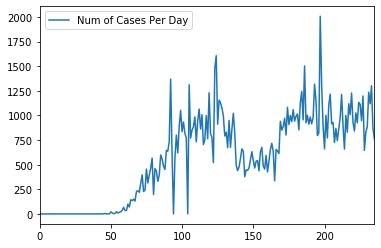

In [52]:
cases = VA_cases.drop(columns=['numOfCasesSinceDay1'])
cases.plot()

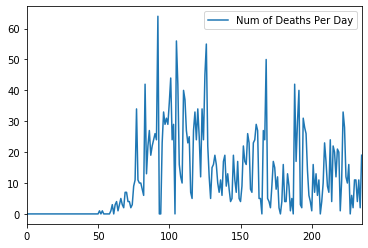

In [53]:
deaths = VA_deaths.drop(columns=['numOfDeathsSinceDay1'])
deaths.plot()

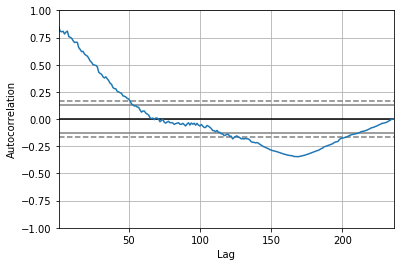

In [54]:
autocorrelation_plot(cases)

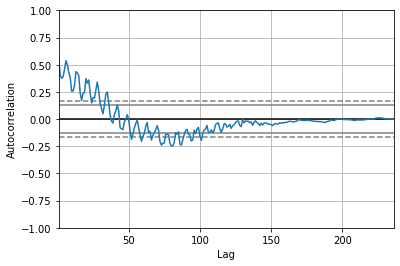

In [55]:
autocorrelation_plot(deaths)

                               ARIMA Model Results                                
Dep. Variable:     D.Num of Cases Per Day   No. Observations:                  235
Model:                     ARIMA(2, 1, 0)   Log Likelihood               -1591.724
Method:                           css-mle   S.D. of innovations            211.353
Date:                    Sun, 15 Nov 2020   AIC                           3191.449
Time:                            22:33:51   BIC                           3205.287
Sample:                                 1   HQIC                          3197.028
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.7867      7.497      0.505      0.614     -10.907      18.481
ar.L1.D.Num of Cases Per Day    -0.5187      

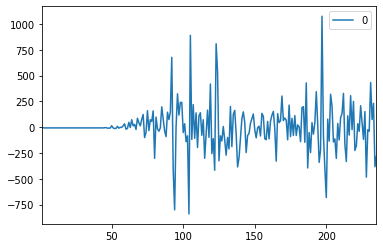

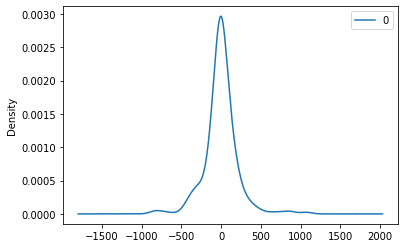

                 0
count   235.000000
mean     -0.015803
std     211.803700
min    -840.002419
25%     -80.089168
50%      -6.982698
75%      74.455806
max    1074.595568


In [56]:
# fit model
model = ARIMA(cases, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())